_____
**Exercício 3**

Faça uma análise exploratória do dataset do `german-credit-data` selecionando-se o número de agrupamentos usando o método do cotovelo e o método da silhueta. Use apenas as variáveis numéricas.
________

### 1 - Importações

In [23]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

# ignorar warnings
warnings.filterwarnings('ignore')

### 2 - Tratamento Inicial dos Dados

In [24]:
# importar os dados
data = pd.read_csv('../data/german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [25]:
# eliminando colunas não utilizadas
data.drop(['Unnamed: 0'], inplace=True, axis=1)

# transformar a coluna Job em texto
data.Job = data.Job.apply(lambda x: str(x))

In [26]:
# checar os tipos de variáveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [27]:
# transformar o risco em números
data.Risk = data.Risk.map({'good': 0, 'bad': 1})

# separar entre preditores (x) e targets (y)
x = data.drop(['Risk'], axis=1)
y = data[['Risk']]


In [28]:
# selecionar (inicialmente) apenas as variáveis numéricas
num_features= x.select_dtypes(include=np.number).columns.tolist()
num_features

['Age', 'Credit amount', 'Duration']

In [29]:
# configurando um pipeline de processamento de dados
pipe_num  = Pipeline([('input_na', SimpleImputer(strategy='mean'))])

# configurar o transformador de colunas
pre_processador = ColumnTransformer([('transf_num', pipe_num, num_features)], remainder='drop')

### 3 - Análise do número ideal de clusters

#### 3.1. Método do Cotovelo

In [30]:
# fazer um loop para extrair WCSS - inércia (inertia)
wcss = []
for k in range(1, 11):

    # configurar um pipeline de modelagem
    final_pipe = Pipeline([
        ('pre_processador', pre_processador),
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=k, random_state=2))
    ])

    # ajustar o modelo
    final_pipe.fit(x)
        
    # extrai  o wcss
    wcss.append(final_pipe['kmeans'].inertia_)

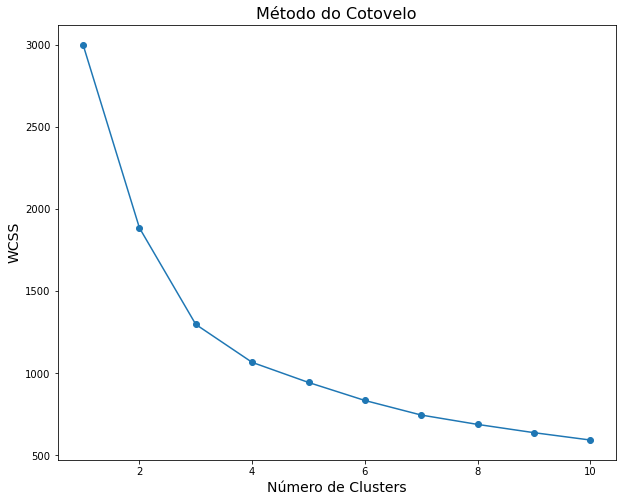

In [31]:
# construir o gráfico do cotovelo
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo', size=16)
plt.xlabel('Número de Clusters', size=14)
plt.ylabel('WCSS', size=14)
plt.show()

#### 3.2. Método da Silhueta

In [32]:
# faz um loop para calcular os scores de silhueta
s = []
for k in range(2, 11):


    # configurar um pipeline de modelagem
    final_pipe = Pipeline([
        ('pre_processador', pre_processador),
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=k, random_state=2))
    ])

    # pipeline de transformação
    transf_pipe = Pipeline([
        ('pre_processador', pre_processador),
        ('scaler', StandardScaler())
    ])
    
    # transformando atributos
    x2 = transf_pipe.fit_transform(x)
    
    # ajustar o modelo
    final_pipe.fit(x)       

    # extrair os nos de clusters
    labels = final_pipe['kmeans'].labels_

    # extrair o score da silhueta
    s.append(silhouette_score(x2, labels))

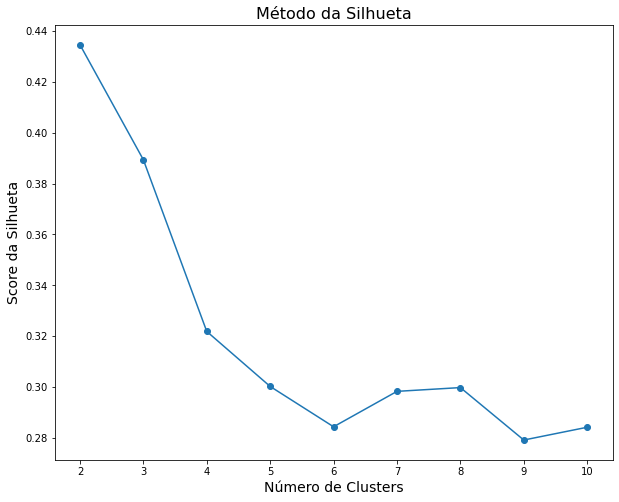

In [33]:
# construir o gráfico do cotovelo
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), s, marker='o')
plt.title('Método da Silhueta', size=16)
plt.xlabel('Número de Clusters', size=14)
plt.ylabel('Score da Silhueta', size=14)
plt.show()

#### 3.3. Conclusão

Pelo método do cotovelo, a inflexão o número de clusters seria 3 ou 4 (onde ocorre a inflexão).
<br>Pelo método da silhueta, o número de cluster seria 2.
<br>Mas esses são apenas valores iniciais a serem considerados. 
<br>O número ideal precisaria ser definido depois de algumas simulaçãoes e uma conversa com a equipe de negócios.
